# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
174,2018-09-05,2888.60,2018-09-14,2906.38,17.78,160.02,9,17143.40
175,2018-10-04,2901.61,2018-11-02,2745.45,-156.16,-1405.44,9,15737.96
176,2019-03-06,2771.45,2019-03-14,2810.38,38.93,350.37,9,16088.33
177,2019-03-22,2800.71,2019-04-02,2868.24,67.53,607.77,9,16696.10
178,2019-05-01,2923.73,2019-06-06,2828.51,-95.22,-856.98,9,15839.12
179,2019-06-26,2913.78,2019-07-02,2964.66,50.88,407.04,8,16246.16
180,2019-07-19,2976.61,2019-07-25,3016.26,39.65,317.20,8,16563.36
181,2019-07-31,2980.38,2019-08-30,2937.09,-43.29,-346.32,8,16217.04
182,2019-09-20,2992.07,2019-10-14,2965.81,-26.26,-210.08,8,16006.96
183,2019-12-03,3093.20,2019-12-13,3166.65,73.45,587.60,8,16594.56


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-12-17,26594.56,26594.56,26594.56,0,26594.56,-
2019-12-18,26594.56,26594.56,26594.56,0,26594.56,-
2019-12-19,26594.56,26594.56,26594.56,0,26594.56,-
2019-12-20,26594.56,26594.56,26594.56,0,26594.56,-
2019-12-23,26594.56,26594.56,26594.56,0,26594.56,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                    2000-01-03
end                                                      2019-12-23
beginning_balance                                             10000
ending_balance                                             26594.56
total_net_profit                                           16594.56
gross_profit                                               31195.59
gross_loss                                                -14601.03
profit_factor                                                  2.14
return_on_initial_capital                                    165.95
annual_return_rate                                             5.02
trading_period                           19 years 11 months 20 days
pct_time_in_market                                            31.56
total_num_trades                                                184
trades_per_year                                                9.21
num_winning_trades                              

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2000-01-03 00:00:00 BUY  6 ^GSPC @ 1455.22
2019-12-23 00:00:00 SELL 6 ^GSPC @ 3224.01


Plot Equity Curves: Strategy vs Benchmark

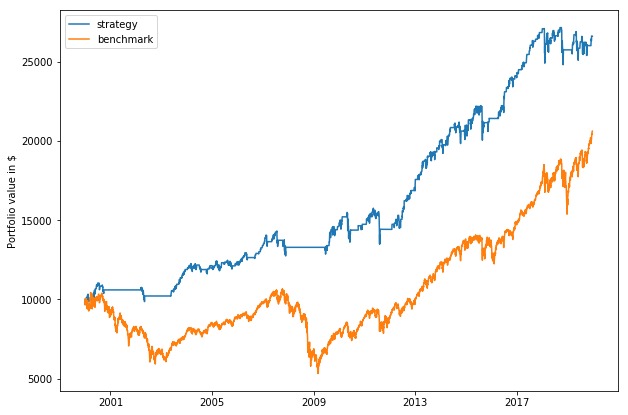

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

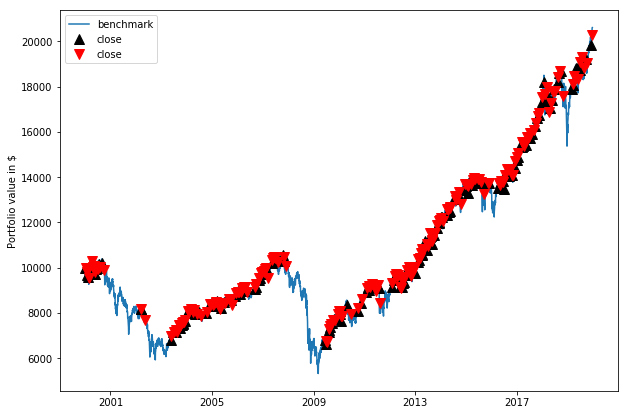

In [12]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.02,3.69
max_closed_out_drawdown,-14.36,-50.02
drawdown_annualized_return,-2.86,-13.56
drawdown_recovery,-0.25,-1.42
best_month,10.29,17.90
worst_month,-12.57,-24.09
sharpe_ratio,0.61,0.31
sortino_ratio,0.43,0.40
monthly_std,1.79,3.78


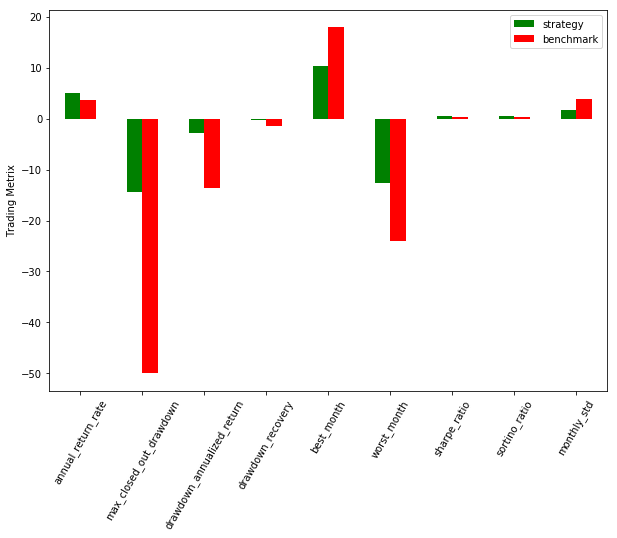

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df